In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.special import factorial
import numpy as np
import matplotlib as mpl

In [2]:
mpl.rcParams["axes.grid"] = True
mpl.rcParams["axes.axisbelow"] = True
mpl.rcParams["figure.constrained_layout.use"] = True
mpl.rcParams["figure.frameon"] = False
mpl.rcParams["font.sans-serif"] = ["Lexend"] + mpl.rcParams["font.sans-serif"]
mpl.rcParams["legend.framealpha"] = 1.0
mpl.rcParams["savefig.dpi"] = 400

In [3]:
df = pd.read_csv("data/combined.csv")

In [4]:
df.head()

,Liga,Saison,Spieltag,Datum,Uhrzeit,Heim,Ergebnis,Gast
0,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,FC Schalke 04,3:1,1860 München
1,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,Hannover 96,2:0,SC Freiburg
2,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,Union Solingen,1:1,Wattenscheid 09
3,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,Freiburger FC,2:0,Bayer 05
4,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,SpVgg Fürth,2:0,Hertha BSC


In [5]:
df["Heimtore"] = df["Ergebnis"].str.split(":").str[0].astype(int)
df["Gasttore"] = df["Ergebnis"].str.split(":").str[1].astype(int)

In [6]:
df.head()

,Liga,Saison,Spieltag,Datum,Uhrzeit,Heim,Ergebnis,Gast,Heimtore,Gasttore
0,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,FC Schalke 04,3:1,1860 München,3,1
1,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,Hannover 96,2:0,SC Freiburg,2,0
2,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,Union Solingen,1:1,Wattenscheid 09,1,1
3,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,Freiburger FC,2:0,Bayer 05,2,0
4,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,SpVgg Fürth,2:0,Hertha BSC,2,0


In [7]:
l_home = df["Heimtore"].mean()
l_away = df["Gasttore"].mean()

print(l_home, ":", l_away)

1.7618876404494381 : 1.1966441947565543


In [8]:
print(np.log2(2**l_home - 1), np.log2(2**l_away - 1))

1.2578649471198928 0.3696719744189604


In [9]:
df["Ergebnis"].mode()

0    1:1
Name: Ergebnis, dtype: object

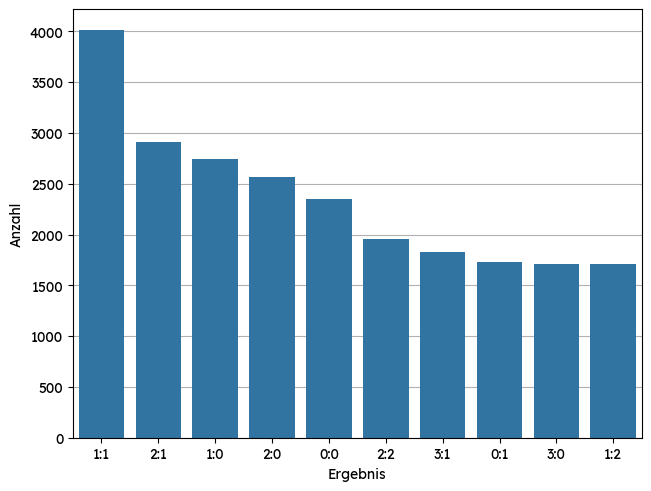

In [10]:
top_scores = df["Ergebnis"].value_counts().head(10)

sb.barplot(top_scores)

plt.ylabel("Anzahl");

In [11]:
def poisson(k, l=1.0):
    return l**k / factorial(k, exact=True) * np.exp(-l)

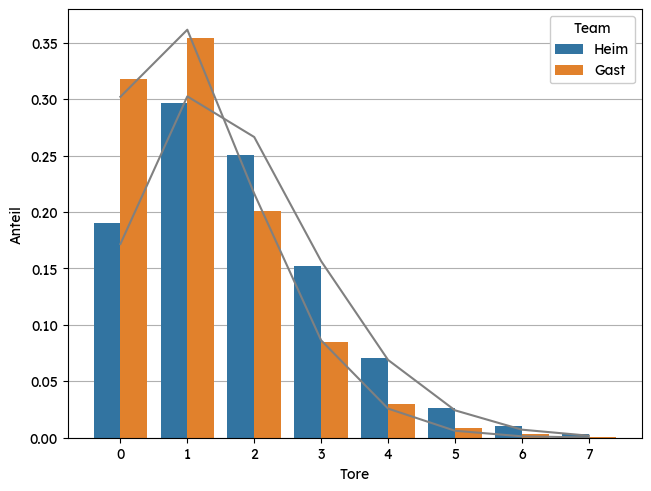

In [12]:
N = 8

home_scores = df["Heimtore"].value_counts().head(N)
home_scores = home_scores.reset_index()
home_scores.columns = ["Tore", "Anzahl"]
home_scores["Anteil"] = home_scores["Anzahl"] / home_scores["Anzahl"].sum()
home_scores["Team"] = "Heim"

away_scores = df["Gasttore"].value_counts().head(N)
away_scores = away_scores.reset_index()
away_scores.columns = ["Tore", "Anzahl"]
away_scores["Anteil"] = away_scores["Anzahl"] / away_scores["Anzahl"].sum()
away_scores["Team"] = "Gast"

scores = pd.concat((home_scores, away_scores))

sb.barplot(scores, x="Tore", y="Anteil", hue="Team")

k_list = np.arange(0, N, 1, dtype=int)
plt.plot(k_list, poisson(k_list, l_home), color="grey")
plt.plot(k_list, poisson(k_list, l_away), color="grey");

# plt.yscale("log");

In [13]:
teams = sorted(list(df["Heim"].unique()))
print(*teams, sep="\n")
print(len(teams), "Vereine")

1.FC Heidenheim
1.FC K'lautern
1.FC Köln
1.FC Magdeburg
1.FC Nürnberg
1.FSV Mainz 05
1860 München
Alem. Aachen
Arm. Bielefeld
Aschaffenburg
B. Leverkusen
B. Neunkirchen
BVL Remscheid
BW Berlin
Babelsberg 03
Bayer 05
Bayern München
Bor. Dortmund
Bor. M'gladbach
Carl Zeiss Jena
Chemnitzer FC
Darmstadt 98
Dynamo Dresden
E. Braunschweig
E. Frankfurt
Eintracht Trier
Energie Cottbus
Erzgebirge Aue
F. Düsseldorf
FC 08 Homburg
FC Augsburg
FC Gütersloh
FC Ingolstadt
FC Remscheid
FC Schalke 04
FC St. Pauli
FSV Frankfurt
FSV Salmrohr
FSV Zwickau
Fortuna Köln
Freiburger FC
Greuther Fürth
Hamburger SV
Hannover 96
Hansa Rostock
Hertha BSC
Hessen Kassel
Holstein Kiel
J. Regensburg
K. Offenbach
KFC Uerdingen
Karlsruher SC
LR Ahlen
Lüttringhausen
MSV Duisburg
Meidericher SV
Pr. Münster
RB Leipzig
RW Essen
RW Oberhausen
Rot Weiss Ahlen
Rot-Weiß Erfurt
SC Freiburg
SC Paderborn
SCC Berlin
SSV Reutlingen
SSV Ulm 1846
SV Elversberg
SV Meppen
SV Sandhausen
Saarbrücken
Schloß-Neuhaus
Schweinfurt 05
SpVgg Bayr